In [1]:
import pandas as pd
data=pd.read_csv("/content/merged_data_new_insert.csv")
data.head()
data['description'] = data['description'].astype(str)

In [2]:
from transformers import pipeline
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [11]:

from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
# load pretrained model

# define the label
label_map = {
    'LABEL_0': 'neutral',
    'LABEL_1': 'negative',
    'LABEL_2': 'positive'
}

# load tokenizer and pre-trained model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# create sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


# apply the model to the 'description'
data['tendency'] = data['description'].apply(lambda x: label_map[sentiment_pipeline(x)[0]['label']])

# save the result
data.to_csv('ML_pipeline.csv', index=False)

print(data[['description', 'tendency']].head())

                                         description  tendency
0  Forian GAAP EPS of $0.04 beats by $0.07, reven...  negative
1  The investor Josh Kushner and his wife, Karlie...  negative
2  Reed's Non-GAAP EPS of -$1.55 misses by $1.24,...   neutral
3  Taiwan-based carrier Starlux Airlines on Aug. ...  negative
4  Norway-based Norse Atlantic Airlines on Sept. ...  negative


In [12]:
data


,author,title,description,source,category,date,tendency
0,NaN,"Forian GAAP EPS of $0.04 beats by $0.07, reven...","Forian GAAP EPS of $0.04 beats by $0.07, reven...",Seeking Alpha,business,2024-03-28,negative
1,"Andrew Ross Sorkin, Ravi Mattu, Bernhard Warne...",Josh Kushner and Karlie Kloss Plan to Revive L...,"The investor Josh Kushner and his wife, Karlie...",The New York Times,business,2024-03-28,negative
2,NaN,"Reed's Non-GAAP EPS of -$1.55 misses by $1.24,...","Reed's Non-GAAP EPS of -$1.55 misses by $1.24,...",Seeking Alpha,business,2024-03-28,neutral
3,cdavis@thebtngroup.com (Chris Davis),Starlux to Add Taipei-Seattle Service,Taiwan-based carrier Starlux Airlines on Aug. ...,Business Travel News,business,2024-03-28,negative
4,cdavis@thebtngroup.com (Chris Davis),Norse to Add Las Vegas-Gatwick Service,Norway-based Norse Atlantic Airlines on Sept. ...,Business Travel News,business,2024-03-28,negative
...,...,...,...,...,...,...,...
131,Reuters,Krispy Kreme shares jump as US partnership wit...,Krispy Kreme shares jump as US partnership wit...,Investing.com | Stock Market Quotes &amp; Fina...,business,2024-03-26,positive
132,NaN,Progress Software considering offer for MariaD...,Progress Software considering offer for MariaD...,Seeking Alpha,business,2024-03-26,negative
133,NaN,"GameStop in charts: Hardware sales slide 12%, ...","GameStop in charts: Hardware sales slide 12%, ...",Seeking Alpha,business,2024-03-26,neutral
134,Investing.com,Surgery Partners prices $800 million in senior...,Surgery Partners prices $800 million in senior...,Investing.com | Stock Market Quotes &amp; Fina...,business,2024-03-26,negative


In [14]:
label_counts=data['tendency'].value_counts()
label_counts

tendency
negative    97
neutral     22
positive    17
Name: count, dtype: int64

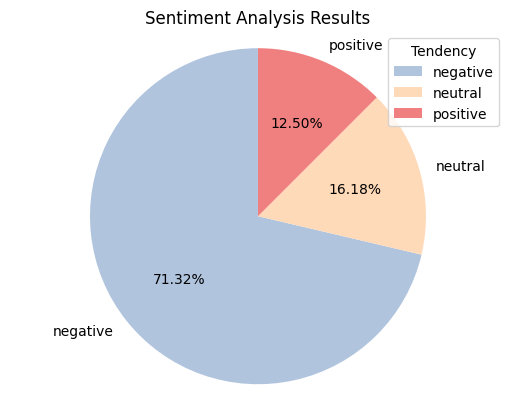

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightsteelblue','peachpuff','lightcoral'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(label_counts.index, title="Tendency")
plt.title("Sentiment Analysis Results")
plt.show()